In [1]:
# Importing all the libraries
import torch
from torch import nn
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import torch
from torch import nn

torch.__version__

# Path of the file to read
train_path = '../input/chest-ctscan-images/Data/train'
test_path = '../input/chest-ctscan-images/Data/test'

print(train_path)

../input/chest-ctscan-images/Data/train


# 1. Display a random image from the dataset

../input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (2).png
../input/chest-ctscan-images/Data/test/adenocarcinoma/000134 (2).png
adenocarcinoma
Random image path: ../input/chest-ctscan-images/Data/test/adenocarcinoma/000134 (2).png
Image class: adenocarcinoma
Image height: 322
Image width: 465


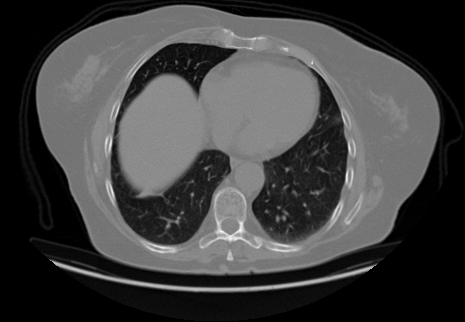

In [2]:
# Visualize an image
import random
from PIL import Image    #helps to display the image
from pathlib import Path #helps to get the file path as a path object

#''/kaggle/input/chest-ctscan-images/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib

## Display a random image of the dataset
# 1. Get all image paths (* means "any combination")
image_path = Path('../input/chest-ctscan-images/Data')
image_path_list = list(image_path.glob('*/*/*.png'))
print(image_path_list[0]) #print's first image to check if works

# 2. Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img
# Image.open("/content/data/pizza_steak_sushi/test/pizza/194643.jpg")

Try to check what the shape of the image is using numpy

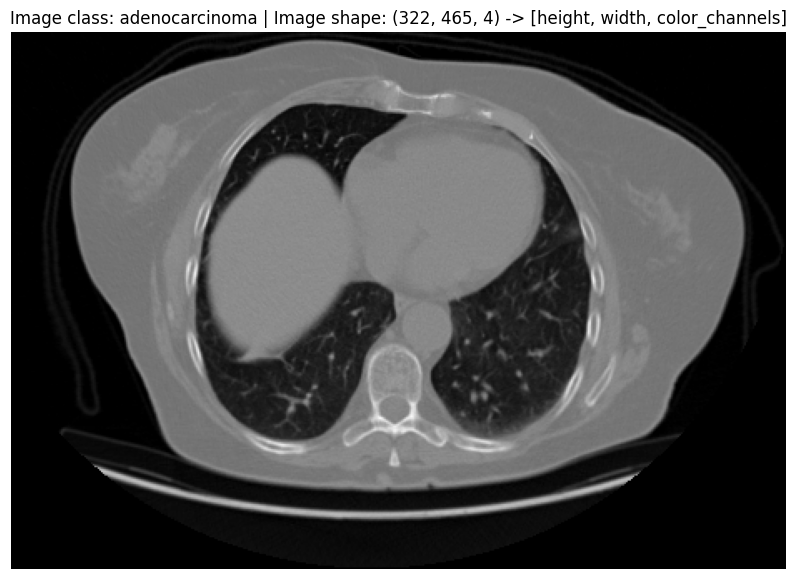

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize = (10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

# 2. Applying data augmentation to the images 

In [4]:
image_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

In [5]:
image_transform(img).shape

torch.Size([4, 64, 64])

Now let's create a function to display images with and without data augmentation

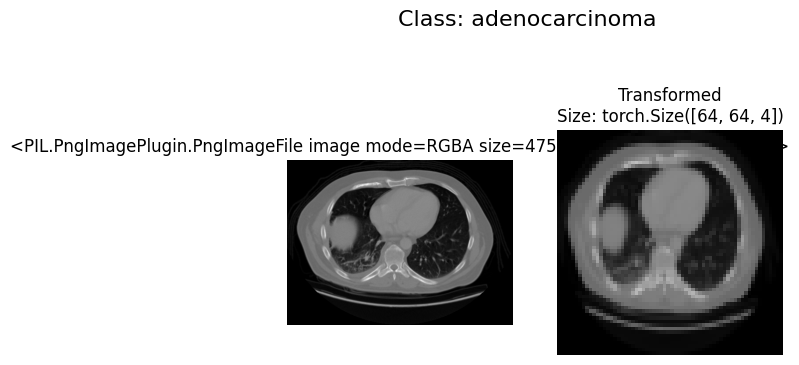

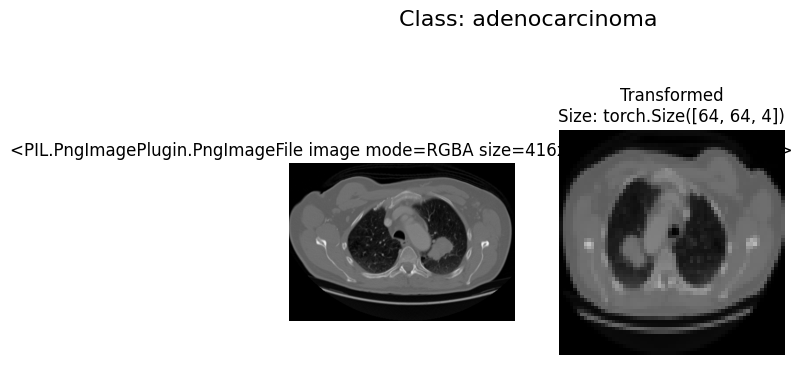

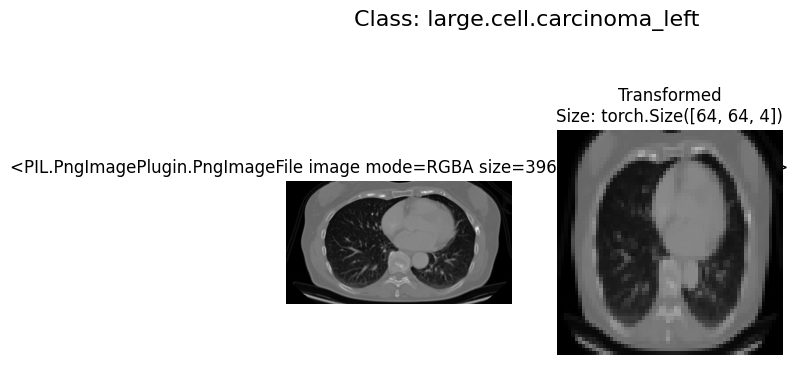

In [6]:
def plot_transformed_images(image_paths: list, transform, n = 3, seed = 42):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k = n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f)
            ax[0].axis(False)
            
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis(False)
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)
    
plot_transformed_images(image_paths = image_path_list,
                        transform = image_transform,
                        n = 3,
                        seed = None)